# An introduction to applied probabilistic inference

These notes borrow heavily from and are based on

* Betancourt, Michael (2019). Probabilistic Modeling and Statistical Inference. Retrieved from https://github.com/betanalpha/knitr_case_studies/tree/master/modeling_and_inference, commit b474ec.
* Betancourt, Michael (2020). Towards A Principled Bayesian Workflow (RStan). Retrieved from https://github.com/betanalpha/knitr_case_studies/tree/master/principled_bayesian_workflow, commit 23eb26.
* [betanalpha/knitr_case_studies](https://github.com/betanalpha/knitr_case_studies)
* [lstmemery/principled-bayesian-workflow-pymc3](https://github.com/lstmemery/principled-bayesian-workflow-pymc3)

# Plotting setup

In [2]:
%run -i 'plotting.py'

# Modeling process

## The world through the lens of probability

### Systems, environments, and observations

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/inferential_config/observational_process/multiple_probes/multiple_probes.png" alt="Drawing" width="90%"/>
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/inferential_config/observational_process/multiple_observational_processes/multiple_observational_processes.png" alt="Drawing" width="90%"/></center>
</div>

### The space of observational models and the true data generating process

#### The observational model
* observation space: $Y$
* arbitrary points in the observation space: $y$
* explicitly realized observations from the observational process $\tilde{y}$
* data generating process: a probability distribution over the observation space
* space of all data generating processes: $\mathcal{P}$
* observational model vs model configuration space: the subspace, $\mathcal{S} \subset \mathcal{P}$, of data generating processes considered in any particular application
* parametrization: a map from a model configuration space $\mathcal{S}$ to a parameter space $\mathcal{\Theta}$ assigning to each model configuration $s \in \mathcal{S}$ a parameter $\theta \in \mathcal{\Theta}$
* probability density for an observational model: $\pi_{\mathcal{S}}(y; s)$ in general using the parametrization to assign $\pi_{\mathcal{S}}(y; \theta)$

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/small_world/small_world/small_world.png" alt="Drawing" width="45%"/>
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/small_world/small_world_one/small_world_one.png" alt="Drawing" width="45%"/>
</center>
</div>

#### The true data generating process
* true data generating process: $\pi^{\dagger}$ is the probability distribution that exactly captures the observational process in a given application

## The practical reality of model construction

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/small_world/small_world_two/small_world_two.png" alt="Drawing" width="75%"/></center>
</div>

## The process of inference

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/inferential_config/model_config/model_config5/model_config5.png" alt="Drawing" width="90%"/></center>
</div>

How can we do our best to validate this process works as close as possible to providing a high quality mirror for natural systems?

# Workflow overview

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/principled_bayesian_workflow/figures/workflow/all/all.png" alt="Drawing" width="70%"/></center>
</div>

# Load libraries

In [3]:
# %pylab inline
# import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import theano.tensor as T
import theano
import numpy as np
# plt.style.use(['seaborn-talk'])
# plt.rcParams["figure.figsize"] = (10,8)
print(pm.__version__)
print(theano.__version__)

3.11.2
1.1.2


## define colors

In [4]:
c_light ="#DCBCBC"
c_light_highlight ="#C79999"
c_mid ="#B97C7C"
c_mid_highlight ="#A25050"
c_dark ="#8F2727"
c_dark_highlight ="#7C0000"

# Section 4.1

The goal of this section is to build a first model that generates (Poisson) counts that may explain what we observe in our sample data.

## Example generative models

### Univariate normal model

From a very simple perspective, generative modeling refers to the situation in which we develop a candidate probabilistic specification of the process from which our data are generated. Usually this will include the specification of prior distributions over all first-order parameters.

<div>
<center>    
<img src="https://www.bayespy.org/_images/tikz-57bc0c88a2974f4c1e2335fe9edb88ff2efdf970.png" style="background-color:white;" alt="Drawing" width="10%"/></center>
</div>

\begin{split}
p(\mathbf{y}|\mu,\tau) &= \prod^{9}_{n=0} \mathcal{N}(y_n|\mu,\tau) \\
p(\mu) &= \mathcal{N}(\mu|0,10^{-6}) \\
p(\tau) &= \mathcal{G}(\tau|10^{-6},10^{-6})
\end{split}

This happens to come from a library called [bayespy](https://github.com/bayespy/bayespy/blob/develop/doc/source/user_guide/quickstart.rst). The best description I am aware of the syntax and semantics of graphical models via factor graph notation is in the [tikz-bayesnet](https://github.com/jluttine/tikz-bayesnet) library [technical report](https://github.com/jluttine/tikz-bayesnet/blob/master/dietz-techreport.pdf).

### Multivariate normal models

<div>
<center>    
<img src="https://www.bayespy.org/_images/tikz-80a1db369be1f25b61ceacfff551dae2bdd331c3.png" style="background-color:white;" alt="Drawing" width="10%"/></center>
</div>

$$\mathbf{y}_{mn} \sim \mathcal{N}(\boldsymbol{\mu}, \mathbf{\Lambda}),\qquad m=0,\ldots,9, \quad n=0,\ldots,29.$$

<div>
<center>    
<img src="https://www.bayespy.org/_images/tikz-97236981a2be663d10ade1ad85caa727621615db.png" style="background-color:white;" alt="Drawing" width="20%"/></center>
</div>

$$\mathbf{y}_{mn} \sim \mathcal{N}(\boldsymbol{\mu}_m,
\mathbf{\Lambda}_n),\qquad m=0,\ldots,9, \quad n=0,\ldots,29.$$

Note that these are for illustrative purposes of the manner in which our data can share parameters and we have not yet defined priors over our parameters.

## Sample data

In [5]:
df = pd.read_csv('data.csv')
print(df.head())
df.shape

  data  value
0    y      5
1    y     10
2    y      7
3    y      0
4    y      0


(1001, 2)

## Building a generative model

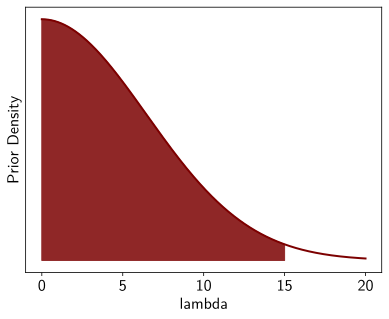

In [6]:
lbda  = np.linspace(0, 20, num=int(20/0.001))

plt.plot(lbda, stats.norm(loc=0,scale=6.44787).pdf(lbda), c=c_dark_highlight, lw=2)
plt.xlabel("lambda"); plt.ylabel("Prior Density"); plt.yticks([]);

lbda99 = np.linspace(0, 15, num=int(15/0.001))
plt.fill_between(lbda99,0.,y2=stats.norm(loc=0,scale=6.44787).pdf(lbda99),color=c_dark);

!mkdir -p ./fig/
plt.savefig("fig/prior-density-lambda.svg", bbox_inches="tight");

In [7]:
!inkscape fig/prior-density-lambda.svg --export-filename=fig/prior-density-lambda.pdf 2>/dev/null

In this case, the candidate _complete Bayesian model_ under consideration is given by

$$
\pi( y_{1}, \ldots, y_{N}, \lambda )
=
\left[ \prod_{n = 1}^{N} \text{Poisson} (y_{n} \mid \lambda) \right]
\cdot \text{HalfNormal} (\lambda \mid 6).
$$

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/principled_bayesian_workflow/figures/iter1/dgm/dgm.png" alt="Drawing" width="40%"/></center>
</div>

In [ ]:
#WORKING

model = pm.Model()
N = 1000
R = 500
with model:
    lbda = pm.HalfNormal("lbda",sd=6.44787)
    
    y = pm.Poisson("y",mu=lbda,shape=(N,),observed=None)
    

In [ ]:
with model:
    trace = pm.sample_prior_predictive(samples=R)

In [ ]:
simu_lbdas = trace['lbda']
simu_ys = trace['y']

In [ ]:
print(simu_lbdas[0:9])
print(simu_lbdas.shape)

In [ ]:
print(simu_ys[0:9])
print(simu_ys.shape)

## Plot prior predictive distribution

In [ ]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, simu_ys)

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

In [ ]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Prior predictive distribution');

## Fit to simulated data

Betancourt performs this for each `y` in trace. For now we just do it for a single one.

In [ ]:
model = pm.Model()
with model:
    lbda = pm.HalfNormal("lbda",sd=6.44787)
    
    y = pm.Poisson("y",mu=lbda,shape=(N,),observed=simu_ys[-1,:])
    
    trace = pm.sample(draws=R,tune=4*R)
   

In [ ]:
pm.plots.traceplot(trace);

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/principled_bayesian_workflow/figures/eye_chart/prior_post_regimes/prior_post_regimes.png" alt="Drawing" width="70%"/></center>
</div>

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/principled_bayesian_workflow/figures/eye_chart/eye_chart_regimes.png" alt="Drawing" width="70%"/></center>
</div>

Posterior z-score

$$
z[f \mid \tilde{y}, \theta^{\dagger}] =
\frac{ \mathbb{E}_{\mathrm{post}}[f \mid \tilde{y}] - f(\theta^{\dagger}) }
{ \mathbb{E}_{\mathrm{post}}[f \mid \tilde{y} ] },
$$

Posterior contraction
$$
c[f \mid \tilde{y}] = 1 -
\frac{ \mathbb{V}_{\mathrm{post}}[f \mid \tilde{y} ] }
{ \mathbb{V}_{\mathrm{prior}}[f \mid \tilde{y} ] },
$$

In [ ]:
# Compute rank of prior draw with respect to thinned posterior draws
sbc_rank = np.sum(simu_lbdas < trace['lbda'][::2])



In [ ]:
# posterior sensitivities analysis
s = pm.stats.summary(trace,varnames=['lbda'])
post_mean_lbda = s['mean'].values
post_sd_lbda = s['sd'].values
prior_sd_lbda = 6.44787
z_score = np.abs((post_mean_lbda - simu_lbdas) / post_sd_lbda)
shrinkage = 1 - (post_sd_lbda / prior_sd_lbda ) ** 2

In [ ]:
plt.plot(shrinkage[0]*np.ones(len(z_score)),z_score,'o',c="#8F272720");
plt.xlim(0,1.01); plt.xlabel('Posterior shrinkage'); plt.ylabel('Posterior z-score');

## Fit observations and evaluate

In [ ]:
df = pd.read_csv('data.csv')
data_ys = df[df['data']=='y']['value'].values

In [ ]:
model = pm.Model()
with model:
    lbda = pm.HalfNormal("lbda",sd=6.44787)
    
    y = pm.Poisson("y",mu=lbda,shape=(N,),observed=data_ys)
    
    trace = pm.sample(draws=R,tune=4*R,chains=4)

In [ ]:
pm.plots.plot_posterior(trace,varnames=['lbda']);

In [ ]:
with model:
     ppc = pm.sample_posterior_predictive(trace)

In [ ]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, ppc['y'])

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

data_hist = np.histogram(data_ys,bins=bins)[0]
data_hist_interp = np.repeat(data_hist, 10)

In [ ]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.plot(bin_interp,data_hist_interp,color='black');
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Posterior predictive distribution');

# Section 4.2

In [ ]:
generative_ensemble2 = pm.Model()

N = 1000
R = 1000

with generative_ensemble2:
    theta = pm.Beta(name="theta", alpha = 1, beta = 1)
    lambda_ = pm.HalfNormal(name="lambda", sd = 6.44787)
    y = pm.ZeroInflatedPoisson(name = "y", psi = theta, theta = lambda_, shape = (N,))

In [ ]:
with generative_ensemble2:
    trace = pm.sample_prior_predictive(samples=R)

In [ ]:
trace["theta"][:10]

In [ ]:
trace["lambda"][:10]

In [ ]:
simu_ys = trace["y"]
simu_ys

In [ ]:
np.count_nonzero(simu_ys, axis=0).std()

In [ ]:
x_max = 30
bins = np.arange(0 ,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)

hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, simu_ys.T)

prctiles = np.percentile(hists,np.linspace(10, 90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)



for i, color in enumerate([c_light, c_light_highlight, c_mid, c_mid_highlight]):
    plt.fill_between(bin_interp, prctiles_interp[i, :],
                     prctiles_interp[-1 - i, :],
                     alpha = 1.0,
                     color = color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Prior predictive distribution');

In [ ]:
simu_ys[simu_ys > 25].size / simu_ys.size

## Fit Simulated Observations and Evaluate 

In [ ]:
fit_data2 = pm.Model()

N = 1000
R = 1000

with fit_data2:
    theta = pm.Beta(name="theta", alpha = 1, beta = 1)
    lambda_ = pm.HalfNormal(name="lambda", sd = 6.44787)
    y = pm.ZeroInflatedPoisson(name = "y", 
                               psi = theta, 
                               theta = lambda_, 
                               shape = (N,),
                               observed=simu_ys[-1,:])

In [ ]:
with fit_data2:
    trace_fit = pm.sample(R)

In [ ]:
pm.plots.traceplot(trace_fit)

In [ ]:
pm.summary(trace_fit, varnames=["theta", "lambda"]).round(2)

In [ ]:
import pickle
with open("fit_data2.pkl", "wb+") as buffer:
    pickle.dump({"model": fit_data2, "trace": trace_fit}, buffer)

# Section 4.3

## Build a generative model

Build a model that generates zero-inflated Poisson counts

In [ ]:
lbda  = np.linspace(0, 20, num=int(20/0.001))
pdf = stats.invgamma(3.48681,scale=9.21604)
plt.plot(lbda, pdf.pdf(lbda), c=c_dark_highlight, lw=2)
plt.xlabel("lambda"); plt.ylabel("Prior Density"); plt.yticks([]);


lbda99 = np.linspace(1, 15, num=int(15/0.001))



plt.fill_between(lbda99,0.,y2=pdf.pdf(lbda99),color=c_dark)

In [ ]:
theta  = np.linspace(0, 1, num=int(1/0.001))
pdf = stats.beta(2.8663,2.8663)
plt.plot(theta, pdf.pdf(theta), c=c_dark_highlight, lw=2)
plt.xlabel("theta"); plt.ylabel("Prior Density"); plt.yticks([]);


theta99 = np.linspace(0.1, 0.9, num=int(0.8/0.001))



plt.fill_between(theta99,0.,y2=pdf.pdf(theta99),color=c_dark)

In [ ]:
#WORKING

model = pm.Model()
N = 1000
R = 1000
with model:
    lbda = pm.InverseGamma("lbda",alpha=3.48681,beta=9.21604)
    theta = pm.Beta("theta",alpha=2.8663,beta=2.8663)
    
    y = pm.ZeroInflatedPoisson("y",psi=theta,theta=lbda,shape=N)
    

In [ ]:
# Note this breaks when N != R
with model:
    trace = pm.sample_prior_predictive(samples=R)

In [ ]:
simu_lbdas = trace['lbda']
simu_thetas = trace['theta']
simu_ys = trace['y']

## Plot prior predictive distribution

In [ ]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 0, simu_ys)

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=1)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

In [ ]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Prior predictive distribution');

## Fit to simulated data

In the example, Betancourt performs this for each `y` in trace. Here we only compute this for one element of the trace.

In [ ]:
model = pm.Model()
with model:
    lbda = pm.InverseGamma("lbda",alpha=3.48681,beta=9.21604)
    theta = pm.Beta("theta",alpha=2.8663,beta=2.8663)
    
    y = pm.ZeroInflatedPoisson("y",psi=theta,theta=lbda,shape=N,observed=simu_ys[:,-1])
    
    trace = pm.sample(draws=R,tune=4*R)
   

In [ ]:
pm.plots.traceplot(trace);

In [ ]:
# Compute rank of prior draw with respect to thinned posterior draws
sbc_rank = np.sum(simu_lbdas < trace['lbda'][::2])



In [ ]:
# posterior sensitivities analysis
s = pm.stats.summary(trace,varnames=['lbda'])
post_mean_lbda = s['mean'].values
post_sd_lbda = s['sd'].values
prior_sd_lbda = 6.44787
z_score = np.abs((post_mean_lbda - simu_lbdas) / post_sd_lbda)
shrinkage = 1 - (post_sd_lbda / prior_sd_lbda ) ** 2

In [ ]:
plt.plot(shrinkage[0]*np.ones(len(z_score)),z_score,'o',c="#8F272720");
plt.xlim(0,1.01); plt.xlabel('Posterior shrinkage'); plt.ylabel('Posterior z-score');

## Fit observations and evaluate

In [ ]:
df = pd.read_csv('data.csv')
data_ys = df[df['data']=='y']['value'].values

In [ ]:
model = pm.Model()
with model:
    lbda = pm.InverseGamma("lbda",alpha=3.48681,beta=9.21604)
    theta = pm.Beta("theta",alpha=2.8663,beta=2.8663)
    
    y = pm.ZeroInflatedPoisson("y",psi=theta,theta=lbda,shape=N,observed=data_ys)
    
    trace = pm.sample(draws=R,tune=4*R,chains=4)

In [ ]:
pm.plots.plot_posterior(trace,varnames=['lbda']);

In [ ]:
with model:
     ppc = pm.sample_ppc(trace)

In [ ]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 0, ppc['y'])

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=1)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

data_hist = np.histogram(data_ys,bins=bins)[0]
data_hist_interp = np.repeat(data_hist, 10)

In [ ]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.plot(bin_interp,data_hist_interp,color='black');
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Posterior predictive distribution');

# Section 4.4

In [ ]:
from pymc3.distributions.distribution import generate_samples,draw_values,Discrete
from pymc3.distributions.discrete import Poisson

def rv_truncated_poisson(mu,mx, size=None):
    mu = np.asarray(mu)
    mx = np.asarray(mx)
    dist = stats.distributions.poisson(mu)

    lower_cdf = 0.
    upper_cdf = dist.cdf(mx)
    nrm = upper_cdf - lower_cdf
    sample = np.random.random_sample(size) * nrm + lower_cdf

    return dist.ppf(sample)

class TruncatedZeroInflatedPoisson(Discrete):

    def __init__(self, mu, mx, psi, *args, **kwargs):
        super(TruncatedZeroInflatedPoisson, self).__init__(*args, **kwargs)
        self.mu  = tt.as_tensor_variable(mu)
        self.mx = tt.as_tensor_variable(mx)
        self.psi = tt.as_tensor_variable(psi)
        self.mode = tt.floor(mu).astype('int32')


    def random(self, point=None, size=None):
        mu, psi, mx = draw_values([self.mu, self.psi, self.mx], point=point, size=size)
        g = generate_samples(rv_truncated_poisson, mu,mx,
                             dist_shape=self.shape,
                             size=size)
        return g * (np.random.random(np.squeeze(g.shape)) < psi)

    def logp(self, value):
        psi = self.psi
        mu = self.mu
        mx = self.mx
        poisson = pm.Poisson.dist(mu)
        logp_val = tt.switch(
            tt.gt(value, 0),
            tt.log(psi) + poisson.logp(value),
            pm.math.logaddexp(tt.log1p(-psi), tt.log(psi) - mu))

        return pm.distributions.dist_math.bound(
            logp_val,
            0 <= value,
            value <= mx,
            0 <= psi, psi <= 1,
            0 <= mu)

In [ ]:
model = pm.Model()
N = 1000
R = 1000
with model:
    lbda = pm.InverseGamma("lbda",alpha=3.48681,beta=9.21604)
    psi = pm.Beta("psi",alpha=2.8663,beta=2.8663)
    
    y = TruncatedZeroInflatedPoisson("y",psi=psi,mu=lbda,mx=15.,shape=N)

In [ ]:
with model:
    trace = pm.sample_prior_predictive(samples=1000)

In [ ]:
simu_lbdas = trace['lbda']
simu_thetas = trace['psi']
simu_ys = trace['y']

In [ ]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 0, simu_ys)

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=1)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

In [ ]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Prior predictive distribution');

In [ ]:
model = pm.Model()
N = 1000
R = 1000
with model:
    lbda = pm.InverseGamma("lbda",alpha=3.48681,beta=9.21604)
    psi = pm.Beta("psi",alpha=2.8663,beta=2.8663)
    
    y = TruncatedZeroInflatedPoisson("y",psi=psi,mu=lbda,mx=14.,shape=N,observed=data_ys)
    trace = pm.sample(draws=R,tune=4*R,chains=4)    

In [ ]:
pm.plots.plot_posterior(trace);

In [ ]:
with model:
     ppc = pm.sample_ppc(trace)

In [ ]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 0, ppc['y'])

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=1)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

data_hist = np.histogram(data_ys,bins=bins)[0]
data_hist_interp = np.repeat(data_hist, 10)

In [ ]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.plot(bin_interp,data_hist_interp,color='black');
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Posterior predictive distribution');